In [21]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.extensions import UnitaryGate
from math import pi, sqrt
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

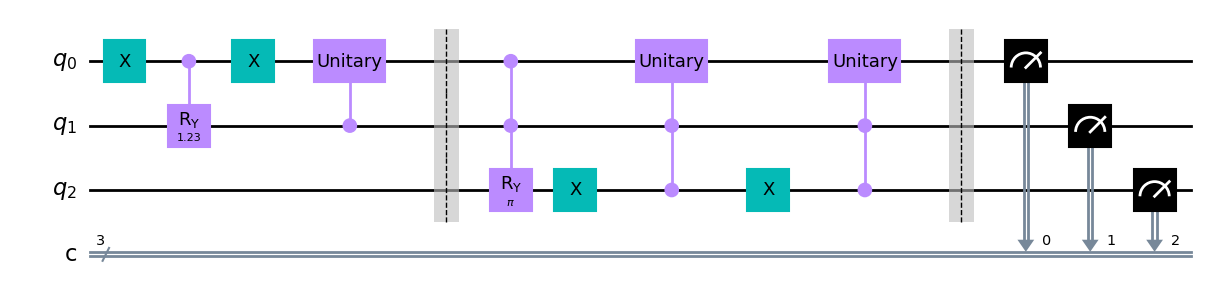

In [38]:
qc = QuantumCircuit(3,3)




qc.x(0)
qc.cry((2*(np.arccos(sqrt(2/3)))),0,1)
qc.x(0)
#qc.cry((pi),0,1)

matrix = [[1/sqrt(2), 1/sqrt(2)],
          [-1/sqrt(2), 1/sqrt(2)]]



v2_1 = UnitaryGate(matrix).control(1)
qc.append(v2_1,[1,0])
qc.barrier()

from qiskit.circuit.library import RYGate
Ry2_2 = RYGate(pi).control(2)
qc.append(Ry2_2,[0,1,2])



qc.x(2)
matrix1 = [[1/2, -sqrt(3)/2],
          [sqrt(3)/2, 1/2]]



v1_2 = UnitaryGate(matrix1).control(2)
qc.append(v1_2,[2,1,0])
qc.x(2)


matrix2 = [[-sqrt(3)/2, 1/2],
          [-1/2, -sqrt(3)/2]]



v2_2 = UnitaryGate(matrix2).control(2)
qc.append(v2_2,[2,1,0])





qc.barrier()

qc.measure([0,1,2],[0,1,2])
qc.draw()




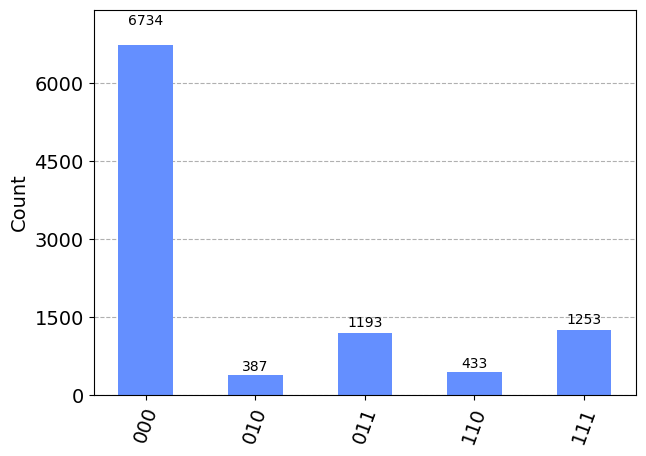

In [39]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 10000)

results = job.result()
plot_histogram(results.get_counts(qc))